In [1]:
import matplotlib.pyplot as plt
from datetime import datetime

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_MesoWest.get_MesoWest import get_mesowest_radius
from BB_HRRR.HRRR_Pando import get_hrrr_variable, hrrr_subset
from BB_wx_calcs.wind import wind_spddir_to_uv

In [2]:
# High-Frequency Radar locations (southern california)
# Source: http://cordc.ucsd.edu/projects/mapping/maps/fullpage.php
HF_radar = {'RAGG':[35.7874, -121.3363],
            'ESTR':[35.4597, -120.9776],
            'DCLR':[35.2175, -120.8626],
            'DCSR':[35.2024, -120.8461],
            'LUIS':[35.1608, -120.7584],
            'FBK1':[34.8698, -120.6212],
            'PTC1':[34.4483, -120.4717],
            'RFG1':[34.4612, -120.0767],
            'COP1':[34.4078, -119.8783],
            'SSD1':[34.4190, -119.5961],
            'MGS1':[34.2049, -119.2516],
            'SCI1':[33.9947, -119.6321],
            'MGS1':[34.2049, -119.2516],
            'NIC1':[34.0423, -118.9154],
            'SCDB':[34.0333, -118.7337],
            'SCTB':[33.8117, -118.3914],
            'SCPF':[33.7049, -118.2940],
            'SNI1':[33.2805, -119.5225],
            'SCCI':[33.4468, -118.4782],
            'SDSC':[32.9177, -118.4869],
            'SCPF':[33.7049, -118.2940],
            'SCNB':[33.6060, -117.9314],
            'SDDP':[33.4607, -117.7067],
            'SDUT':[33.3884, -117.5957],
            'SDSE':[33.0245, -117.2861],
            'SDSL':[32.8694, -117.2532],
            'SDWW':[32.6799, -117.2474],
            'SDPL':[32.6658, -117.2396],
            'SDBP':[32.5359, -117.1223],
            'SDCI':[32.4141, -117.2437]}

In [3]:
STID = 'UCSC'
m = draw_centermap(STID, size=(1.5,2.5))


Retrieving from MesoWest API: http://api.mesowest.net/v2/stations/metadata?&token=2562b729557f45f5958516081f06c9eb&stid=UCSC



In [4]:
import numpy as np

In [5]:
states = np.genfromtxt('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/data/states_latlon.csv', names=True, delimiter=',', dtype=None, encoding='UTF-8')

In [6]:
mCA = draw_centermap('California', size=(6.5,5.5))

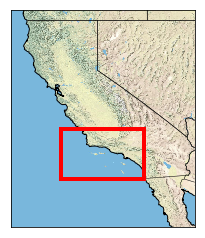

In [7]:
mCA.drawcoastlines()
mCA.drawstates()
mCA.drawcountries()
mCA.arcgisimage(service='World_Physical_Map', dpi=1500, xpixels=1000)

plt.plot([m.lonmin, m.lonmin], [m.latmax, m.latmin], color='r', linewidth=4)
plt.plot([m.lonmax, m.lonmin], [m.latmax, m.latmax], color='r', linewidth=4)
plt.plot([m.lonmax, m.lonmin], [m.latmin, m.latmin], color='r', linewidth=4)
plt.plot([m.lonmax, m.lonmax], [m.latmax, m.latmin], color='r', linewidth=4)

plt.savefig('CA', transparent=True, bbox_inches='tight', dpi=300)

In [213]:
DATE = datetime(2017, 10, 14, 17, 25, 33) #Scatterometer overpass date
#DATE = datetime(2017, 10, 14, 13)         #Other date

b = get_mesowest_radius(DATE, STID, radius=200, verbose=False, variables='wind_speed,wind_direction')

In [214]:
DATE

datetime.datetime(2017, 10, 14, 17, 25, 33)

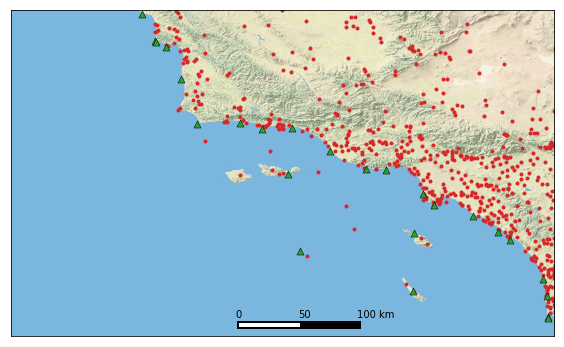

In [215]:
plt.figure(figsize=[10,6])
m.scatter(b['LON'], b['LAT'], marker='.', color='tab:red')

for name, [rlat, rlon] in HF_radar.items():
    m.scatter(rlon, rlat, marker='^', s=50, edgecolor='k', linewidth=.5, color='tab:green')
    
m.arcgisimage(service='World_Physical_Map', dpi=1500, xpixels=10000)

# Hack a distance scale: (computed from https://www.nhc.noaa.gov/gccalc.shtml)
m.plot([-120.07, -119.], [32.6, 32.6], color='k', linewidth=8)
m.plot([-120.07, -119.54], [32.6, 32.6], color='w', linewidth=4)
plt.text(-120.12, 32.67, '0')
plt.text(-119.54, 32.67, '50')
plt.text(-119., 32.67, '100 km')

plt.savefig('Southern_California', bbox_inches='tight', dpi=300)

In [216]:
bu, bv = wind_spddir_to_uv(b['wind_speed'], b['wind_direction'])

In [219]:
H = get_hrrr_variable(DATE, 'UVGRD:10 m')


 >> Dowloading tempfile: ./temp_hrrr_2017101413_f00_UVG.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20171014/hrrr.t13z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20171014/hrrr.t13z.wrfsfcf00.grib2.idx
 >> Matched a variable:  59:40476072:d=2017101413:UGRD:10 m above ground:anl
 >> Byte Range: 40476072 42974161
 >> Converting winds to earth-relative
  Run Date: 2017-10-14 13:00 UTC F00
Valid Date: 2017-10-14 13:00 UTC


 >> Requested Center lat: 35.43361	 lon: -119.05667
 >>     Plucked HRRR lat: 35.42243519091162	 lon: -119.05884175084657
 >>     Plucked from   x: 491	   y: 253
 >> Size of subset: 50 x 50 grid points


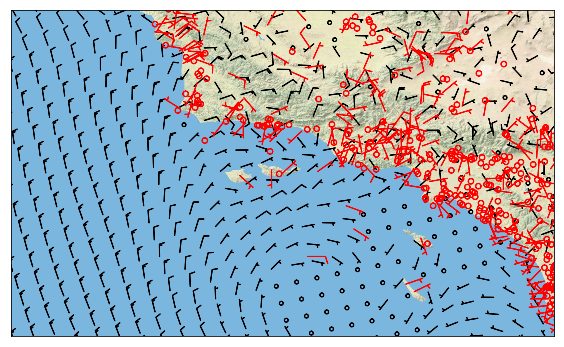

In [220]:
Hs = hrrr_subset(H, half_box=150, lat=b['LAT'][0], lon=b['LON'][0], thin=6)

plt.figure(figsize=[10,6])
m.barbs(Hs['lon'], Hs['lat'], Hs['UGRD'], Hs['VGRD'], latlon=True,
        barb_increments=dict(half=2.5, full=5, flag=25), length=5)
m.barbs(b['LON'], b['LAT'], bu, bv, latlon=True, color='r',
        barb_increments=dict(half=2.5, full=5, flag=25), length=6)
#m.drawcoastlines()
m.arcgisimage(service='World_Physical_Map', dpi=1500, xpixels=10000)

plt.savefig('Southern_California_winds_%s' % (DATE.strftime('%Y-%m-%d_%H%M')),
             bbox_inches='tight', dpi=300)

In [63]:
# ASCAT Data
# Source: https://podaac.jpl.nasa.gov/dataset/ASCATB-L2-25km

In [221]:
import xarray

# Scatterometer
FILE = 'ascat_20171014_164500_metopb_26326_eps_o_250_2401_ovw.l2.nc'
x = xarray.open_dataset(FILE)

In [222]:
f_lon = x.lon.data.copy()
f_lon[x.lon>180] = f_lon[x.lon>180]-360

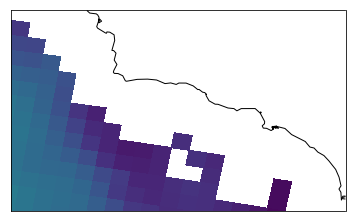

In [223]:
m.pcolormesh(f_lon, x.lat, x.wind_speed, latlon=True)
m.drawcoastlines()

In [224]:
ascat_u, ascat_v = wind_spddir_to_uv(x.wind_speed, x.wind_dir)

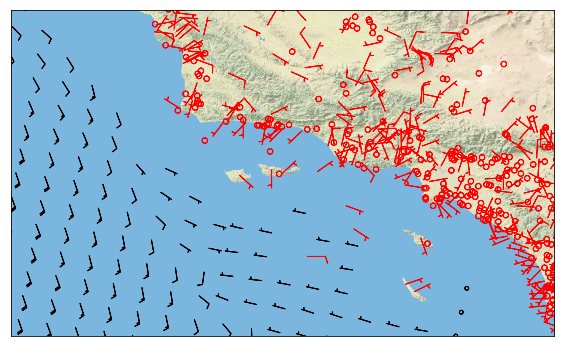

In [225]:
plt.figure(figsize=[10,6])

m.barbs(f_lon, x.lat, ascat_u, ascat_v, latlon=True,
        barb_increments=dict(half=2.5, full=5, flag=25), length=5)

m.barbs(b['LON'], b['LAT'], bu, bv, latlon=True, color='r',
        barb_increments=dict(half=2.5, full=5, flag=25), length=6)

m.arcgisimage(service='World_Physical_Map', dpi=1500, xpixels=1000)


plt.savefig('Southern_California_ASCAT_%s' % (DATE.strftime('%Y-%m-%d_%H%M')),
             bbox_inches='tight', dpi=300)

In [230]:
scan_in_map_lat = np.logical_and(x.lat.data<m.latmax, x.lat.data>m.latmin)
scan_in_map_lon = np.logical_and(f_lon>m.lonmin, f_lon<m.lonmax)
scan_in_map = np.where(np.logical_and(scan_in_map_lat, scan_in_map_lon))

In [231]:
str_dates = x.time.data[scan_in_map]
DATES = [datetime.strptime(str(d), '%Y-%m-%dT%H:%M:%S.000000000') for d in str_dates]

In [232]:
# Maximim and minimum dates of data for the domain in map
np.max(DATES), np.min(DATES)

(datetime.datetime(2017, 10, 14, 17, 25, 33),
 datetime.datetime(2017, 10, 14, 17, 24, 37))

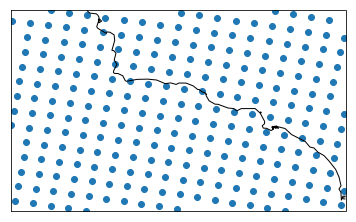

In [206]:
m.scatter(f_lon[scan_in_map], x.lat.data[scan_in_map])
m.drawcoastlines()

In [227]:
x.title

'MetOp-B ASCAT Level 2 25.0 km Ocean Surface Wind Vector Product'

In [233]:
str(np.max(DATES))

'2017-10-14 17:25:33'

In [235]:
str(DATE)

'2017-10-14 13:00:00'

In [239]:
b['DATETIME']

datetime.datetime(2017, 10, 14, 17, 25, 33)